In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random as rd
tfd = tf.contrib.distributions
print(tf.__version__)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

1.15.0


# Task 3/4: Variational Auto-Encoder (Part 2: Latent dimension 32)

In [2]:
# Load mnist data set and use 10.000 samples for the test set and 60.000 samples for the training set 
data_train, data_test = tf.keras.datasets.mnist.load_data()
# Compute highest pixel value
xmax = max(max(np.matrix.flatten(data_test[0])), max(np.matrix.flatten(data_test[0])))
# Compute lowest pixel value
xmin = min(min(np.matrix.flatten(data_test[0])), min(np.matrix.flatten(data_test[0])))
# Normalise the data values between 0 and 1
data_train_norm = np.reshape((data_train[0]-xmin)/(xmax-xmin), (-1, 784))
data_test_norm = np.reshape((data_test[0]-xmin)/(xmax-xmin), (-1, 784))

In [3]:
# Define architecture of the neural networks

# Encoder/posterior: q(z|x) 
def make_encoder(data, code_size):
  # Flatten the picture data into a long vector
  x = tf.layers.flatten(data)
  # First hidden layer with 256 neurons and relu activation faunction 
  x = tf.layers.dense(x, 256, tf.nn.relu)
  # Second hidden layer with 256 neurons and relu activation faunction
  x = tf.layers.dense(x, 256, tf.nn.relu)
  # Output layer with code_size dimensionality which gives ...
  # ... the mean ...
  loc = tf.layers.dense(x, code_size)
  # ... and the diagonal of the scale matrix which is used for the covarinace matrix (cov=scale*scale.T) ... 
  # ... further it can be called the standard deviation 
  scale = tf.layers.dense(x, code_size, tf.nn.softplus)
  # Finally we return the posterior probability distribution in form of a multivariate normal distribution with diagonal covariance matrix  
  return tfd.MultivariateNormalDiag(loc, scale)

# Prior:p(z)
def make_prior(code_size):
  # Zero mean
  loc = tf.zeros(code_size)
  # Identity matrix as standard deveation and consequently covariance matrix 
  scale = tf.ones(code_size)
  # Return prior as code_size dimensional normal distribution with diagonal covariance matrix
  return tfd.MultivariateNormalDiag(loc, scale)

# Decoder/likelihood: p(x|z) 
def make_decoder(code, data_shape):
  # Code is latent variable z
  x = code
  # First hidden layer with 256 neurons and relu activation faunction 
  x = tf.layers.dense(x, 256, tf.nn.relu)
  # Second hidden layer with 256 neurons and relu activation faunction
  x = tf.layers.dense(x, 256, tf.nn.relu)
  # Output layer for the mean values producing a long vector with the dimensonalty equal to the number of pixels
  logit = tf.layers.dense(x, np.prod(data_shape))
  # Using only one layer with output shape of the long picture vector and sigmoid activation function since the standard deviation is always positive and the data is between 0 and 1
  z = tf.ones((1,1), dtype=tf.float32)
  standard_deviation = tf.layers.dense(z, np.prod(data_shape), tf.nn.sigmoid)
  # Return likelihood as picture size dimensional normal distribution with diagonal covariance matrix
  return  tfd.MultivariateNormalDiag(logit, standard_deviation)

# Plot the representation of data in latent space
def plot_codes(ax, codes, labels):
  scatter = ax.scatter(codes[:, 0], codes[:, 1], s=2, c=labels, label=labels, alpha=0.3)
  ax.set_aspect('equal')
  ax.set_xlim(codes.min() - .1, codes.max() + .1)
  ax.set_ylim(codes.min() - .1, codes.max() + .1)
  ax.tick_params(axis='both', which='both', left='off', bottom='off', labelleft='off', labelbottom='off')
  ax.set_xlabel('z1', fontsize=20)
  ax.set_ylabel('z2', fontsize=20)
  legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", fontsize=15)#, title="Classes"
  ax.add_artist(legend1)
  
# Plot pictures
def plot_samples(ax, samples):
  for index, sample in enumerate(samples):
    ax[index].imshow(sample, cmap='gray')
    ax[index].set_xticks([])
    ax[index].set_yticks([])

In [4]:
# Initialise the data tensor as placeholder
data_l30 = tf.placeholder(tf.float32, [None, 28* 28])

# Create a template of the encoder and decoder such that the parameters stay the same
make_encoder_l30 = tf.make_template('encoder_l30', make_encoder)
make_decoder_l30 = tf.make_template('decoder_l30', make_decoder)

# Define the model with latent variable 2
prior_l30 = make_prior(code_size=32)
posterior_l30 = make_encoder_l30(data_l30, code_size=32)
code_l30 = posterior_l30.sample()

# Define the loss
likelihood_l30 = make_decoder_l30(code_l30, [28, 28]).log_prob(data_l30)
divergence_l30 = tfd.kl_divergence(posterior_l30, prior_l30)
elbo_l30 = tf.reduce_mean(likelihood_l30 - divergence_l30)
# Set up the Adam optimizer with learning rate 0.001
optimize_l30 = tf.train.AdamOptimizer(0.001).minimize(-elbo_l30)

# Generate encoded sample picure in latent sapce and return decoded mean  
samples_generated_mean_l30 = make_decoder_l30(prior_l30.sample(15, seed=1), [28, 28]).mean()

# Generate encoded sample picure in latent sapce and return decoded sample  
samples_generated_sample_l30 = make_decoder_l30(prior_l30.sample(15, seed=1), [28, 28]).sample()

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlo

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch 1 -elbo 383.31784
Epoch 2 -elbo -124.510414
Epoch 3 -elbo -520.9584
Epoch 4 -elbo -827.3756
Epoch 5 -elbo -1037.9622
Epoch 6 -elbo -1174.9279
Epoch 7 -elbo -1258.0476
Epoch 8 -elbo -1297.191
Epoch 9 -elbo -1343.9543
Epoch 10 -elbo -1360.5304
Epoch 11 -elbo -1372.9492
Epoch 12 -elbo -1380.8866
Epoch 13 -elbo -1407.4658
Epoch 14 -elbo -1410.9543
Epoch 15 -elbo -1416.9908
Epoch 16 -elbo -1427.4742
Epoch 17 -elbo -1442.3429
Epoch 18 -elbo -1412.589
Epoch 19 -elbo -1429.0555
Epoch 20 -elbo -1452.6744
Epoch 21 -elbo -1437.1987
Epoch 22 -elbo -1451.4587
Epoch 23 -elbo -1448.834
Epoch 24 -elbo -1451.0593
Epoch 25 -elbo -1467.5275
Epoch 26 -elbo -1447.3772
Epoch 27 -elbo -1449.4897
Epoch 28 -elbo -1465.8202
Epoch 29 -elbo -1475.2332
Epoch 30 -elbo -1458.5211
Epoch 31 -elbo -1474

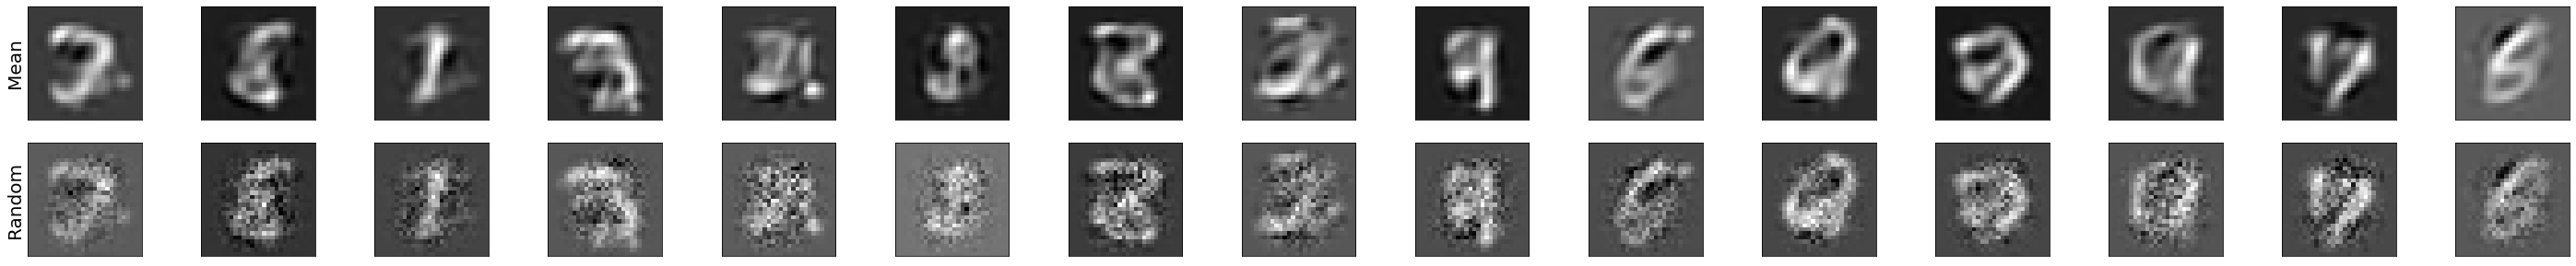

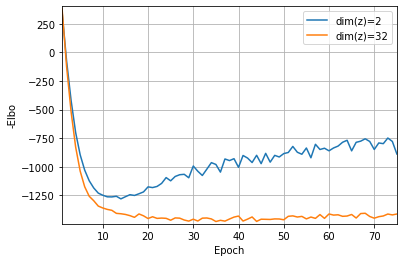

In [5]:
# Create frame for the plot of the generated pictures that are decoded
fig_l30, ax_l30 = plt.subplots(nrows=2, ncols=15, figsize=(50, 5))

# Set training parameters
batch_size_l30 = int(128)
epoch_number_l30 = 75

# Initialise vectors which store some training data
elbo_history_l30 = np.array([0, np.inf])

# Start training
with tf.train.MonitoredSession() as sess:

  # Train until the loss does not change remarkeable
  for epoch in range(1,epoch_number_l30 + 1):
    # Put normalised test data in a dictionary 
    feed = {data_l30: data_test_norm}
    # Compute the Loss/elbo and compute the decoded mean (picture) of randomly from the prior sampled latent coordinates   
    test_elbo_l30, test_samples_generated_mean_l30, test_samples_generated_sample_l30 = sess.run([elbo_l30, samples_generated_mean_l30, samples_generated_sample_l30], feed)
    # Store the history of test loss/elbo
    elbo_history_l30 = np.append(elbo_history_l30, np.array([test_elbo_l30]))
    # Print the Epoch and the test loss/elbo
    print('Epoch', epoch, '-elbo', -test_elbo_l30)

    # Store the number of training samples (60.000) 
    number_train_data = data_train[0].shape[0]
    # Rondomly sample 60.000 indices
    batch_l30 = rd.sample(range(number_train_data), number_train_data)
    # Compute the total number of batches
    batch_number_l30 = int(np.floor(number_train_data/batch_size_l30))

    # Go through all batches
    for iter in range(batch_number_l30):
      # Construct the batch as dictionary from the training data 
      feed = {data_l30: data_train_norm[batch_l30[iter*batch_size_l30:((iter+1)*batch_size_l30)-1]]}
      # Compute one update step of the network parameter
      sess.run(optimize_l30, feed)#

# Plot picture of the generated samples
ax_l30[0, 0].set_ylabel('Mean', fontsize=20)
ax_l30[1, 0].set_ylabel('Random', fontsize=20)
plot_samples(ax_l30[0, :], np.reshape(test_samples_generated_mean_l30, (-1,28,28)))
plot_samples(ax_l30[1, :], np.reshape(test_samples_generated_sample_l30, (-1,28,28)))

# Plot -ELBO over epochs 
elbo_history = np.load('Elbo2.npy')
fig_elbo_l30, ax_elbo_l30 = plt.subplots(nrows=1, ncols=1)
ax_elbo_l30.set_xlim(1, 75)
ax_elbo_l30.set_ylim(min(min(-elbo_history_l30[2:]), min(-elbo_history[2:]))-20, max(max(-elbo_history_l30[2:]), max(-elbo_history[2:]))+20)
ax_elbo_l30.set_xlabel('Epoch')
ax_elbo_l30.set_ylabel('-Elbo')
ax_elbo_l30.grid()
ax_elbo_l30.plot(range(1,epoch_number_l30+1), -elbo_history[2:], label='dim(z)=2')
ax_elbo_l30.plot(range(1,epoch_number_l30+1), -elbo_history_l30[2:], label='dim(z)=32')
ax_elbo_l30.legend()
fig_elbo_l30.savefig('elbo_32.png', dpi=400)

# Save the figures
fig_l30.savefig('generated_l32.png', dpi=200, transparent=True, bbox_inches='tight')